In [109]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [110]:
df_train=pd.read_csv('../datasets/Trainset.csv')
df_target=pd.read_csv('../datasets/y_train.csv')


In [111]:
df_test=pd.read_csv('../datasets/Testset.csv')
df_target_test=pd.read_csv('../datasets/y_test.csv')

In [112]:
df_train['Churn']=df_target

In [113]:
df_no=df_train[df_train.Churn==0]

In [114]:
df_yes=df_train[df_train.Churn==1]

In [115]:
df_no=df_no.sample(1495)

In [116]:
df_train=df_no.append(df_yes)

In [117]:
df_train=df_train.sort_index()

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [119]:
attributes = [col for col in df_train.columns if col != 'Churn']
X = df_train[attributes].values
y = df_train['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100, 
                                                    stratify=y)

In [120]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=200, min_samples_leaf=50)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [121]:
y_pred_train=clf.predict(X_train)

In [122]:
print('Accuracy %s' % accuracy_score(y_train, y_pred_train))
print('F1-score %s' % f1_score(y_train, y_pred_train, average=None))

Accuracy 0.7612876254180602
F1-score [0.77296223 0.74834729]


In [123]:
y_pred_valid=clf.predict(X_valid)

In [124]:
print('Accuracy %s' % accuracy_score(y_valid, y_pred_valid))
print('F1-score %s' % f1_score(y_valid, y_pred_valid, average=None))

Accuracy 0.7324414715719063
F1-score [0.74522293 0.71830986]


In [125]:
print('Accuracy %s' % accuracy_score(y_train, y_pred_train))
print('F1-score %s' % f1_score(y_train, y_pred_train, average=None))
print(classification_report(y_train, y_pred_train))
confusion_matrix(y_train, y_pred_train)

Accuracy 0.7612876254180602
F1-score [0.77296223 0.74834729]
             precision    recall  f1-score   support

          0       0.74      0.81      0.77      1196
          1       0.79      0.71      0.75      1196

avg / total       0.76      0.76      0.76      2392



array([[972, 224],
       [347, 849]], dtype=int64)

In [126]:
print('Accuracy %s' % accuracy_score(y_valid, y_pred_valid))
print('F1-score %s' % f1_score(y_valid, y_pred_valid, average=None))
print(classification_report(y_valid, y_pred_valid))
confusion_matrix(y_valid, y_pred_valid)

Accuracy 0.7324414715719063
F1-score [0.74522293 0.71830986]
             precision    recall  f1-score   support

          0       0.71      0.78      0.75       299
          1       0.76      0.68      0.72       299

avg / total       0.73      0.73      0.73       598



array([[234,  65],
       [ 95, 204]], dtype=int64)

In [127]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7549 (+/- 0.05)
F1-score: 0.7544 (+/- 0.05)


In [128]:
df_train.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'ServiceCount', 'tenure',
       'Churn'], dtype=object)

In [129]:
df_test.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'ServiceCount', 'tenure'],
      dtype=object)

In [130]:
df_test
df_target_test

,Churn
0,1
1,0
2,1
3,0
4,0
5,0
6,1
7,0
8,0
9,1


In [131]:
df_train[attributes].columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'ServiceCount', 'tenure'],
      dtype=object)

In [132]:
df_test[attributes].columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'ServiceCount', 'tenure'],
      dtype=object)

In [133]:
attributes

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'ServiceCount',
 'tenure']

In [135]:
df_test['Churn']=df_target_test

In [136]:
df_test_yes=df_test[df_test.Churn==1]
df_test_no=df_test[df_test.Churn==0].sample(374)
df_test=df_test_yes.append(df_test_no)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 865
Data columns (total 21 columns):
gender              748 non-null float64
SeniorCitizen       748 non-null float64
Partner             748 non-null float64
Dependents          748 non-null float64
PhoneService        748 non-null float64
MultipleLines       748 non-null float64
InternetService     748 non-null float64
OnlineSecurity      748 non-null float64
OnlineBackup        748 non-null float64
DeviceProtection    748 non-null float64
TechSupport         748 non-null float64
StreamingTV         748 non-null float64
StreamingMovies     748 non-null float64
Contract            748 non-null float64
PaperlessBilling    748 non-null float64
PaymentMethod       748 non-null float64
MonthlyCharges      748 non-null float64
TotalCharges        748 non-null float64
ServiceCount        748 non-null float64
tenure              748 non-null float64
Churn               748 non-null int64
dtypes: float64(20), int64(1)
memory

In [140]:
y_test=df_test.Churn

In [141]:
df_test=df_test.drop('Churn',axis=1)

In [142]:
X_test=df_test[attributes].values

Test

In [143]:
y_pred_test=clf.predict(X_test)

In [144]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_test))
print('F1-score %s' % f1_score(y_test, y_pred_test, average=None))

Accuracy 0.7312834224598931
F1-score [0.73997413 0.7219917 ]


In [145]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_test))
print('F1-score %s' % f1_score(y_test, y_pred_test, average=None))
print(classification_report(y_test, y_pred_test))
confusion_matrix(y_test, y_pred_test)

Accuracy 0.7312834224598931
F1-score [0.73997413 0.7219917 ]
             precision    recall  f1-score   support

          0       0.72      0.76      0.74       374
          1       0.75      0.70      0.72       374

avg / total       0.73      0.73      0.73       748



array([[286,  88],
       [113, 261]], dtype=int64)

In [146]:
importance= clf.feature_importances_
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01857031, 0.        , 0.        ,
       0.09217766, 0.        , 0.        , 0.68208331, 0.        ,
       0.        , 0.13032353, 0.        , 0.        , 0.07684519])

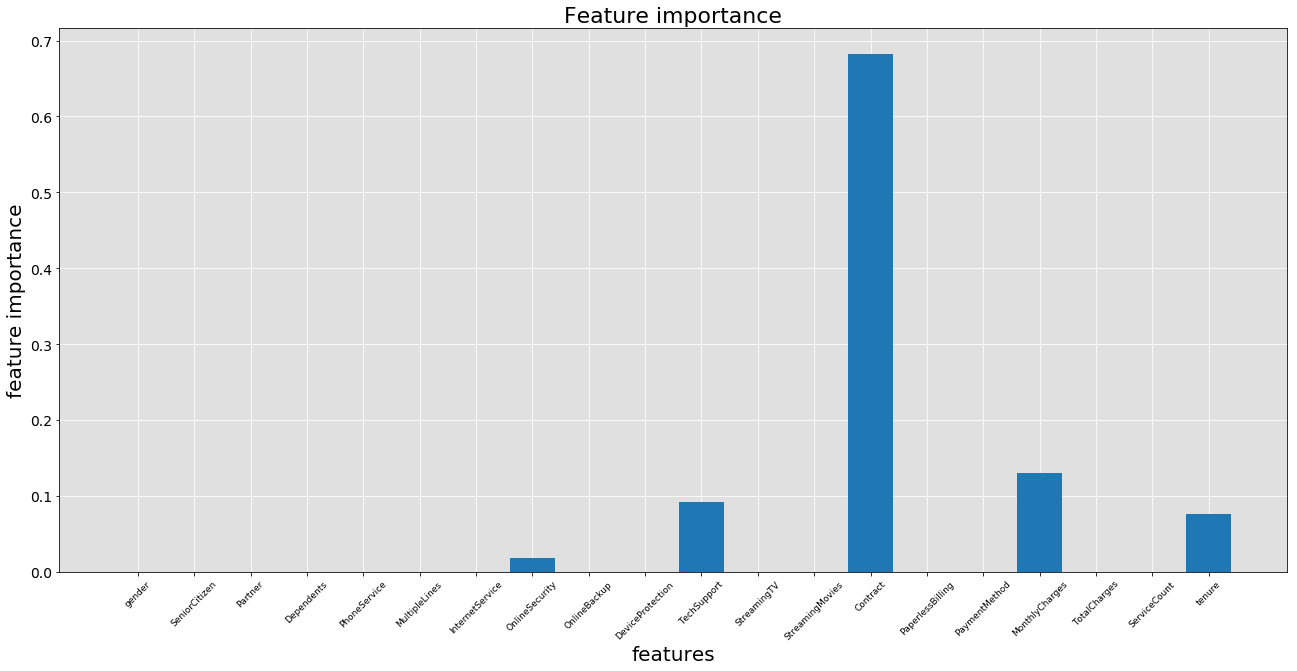

In [159]:
f = plt.figure(figsize=(22,10))
ax = f.add_subplot(1,1,1)
ax.bar(df_train.drop(['Churn'],axis=1).columns, importance)

plt.ylabel('feature importance',fontsize=20)
plt.xlabel('features',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=9,rotation=45)
plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Feature importance', fontsize=22)

plt.savefig('featureimportance.png')
plt.show()

In [21]:
import pydotplus
from sklearn import tree
from IPython.display import Image

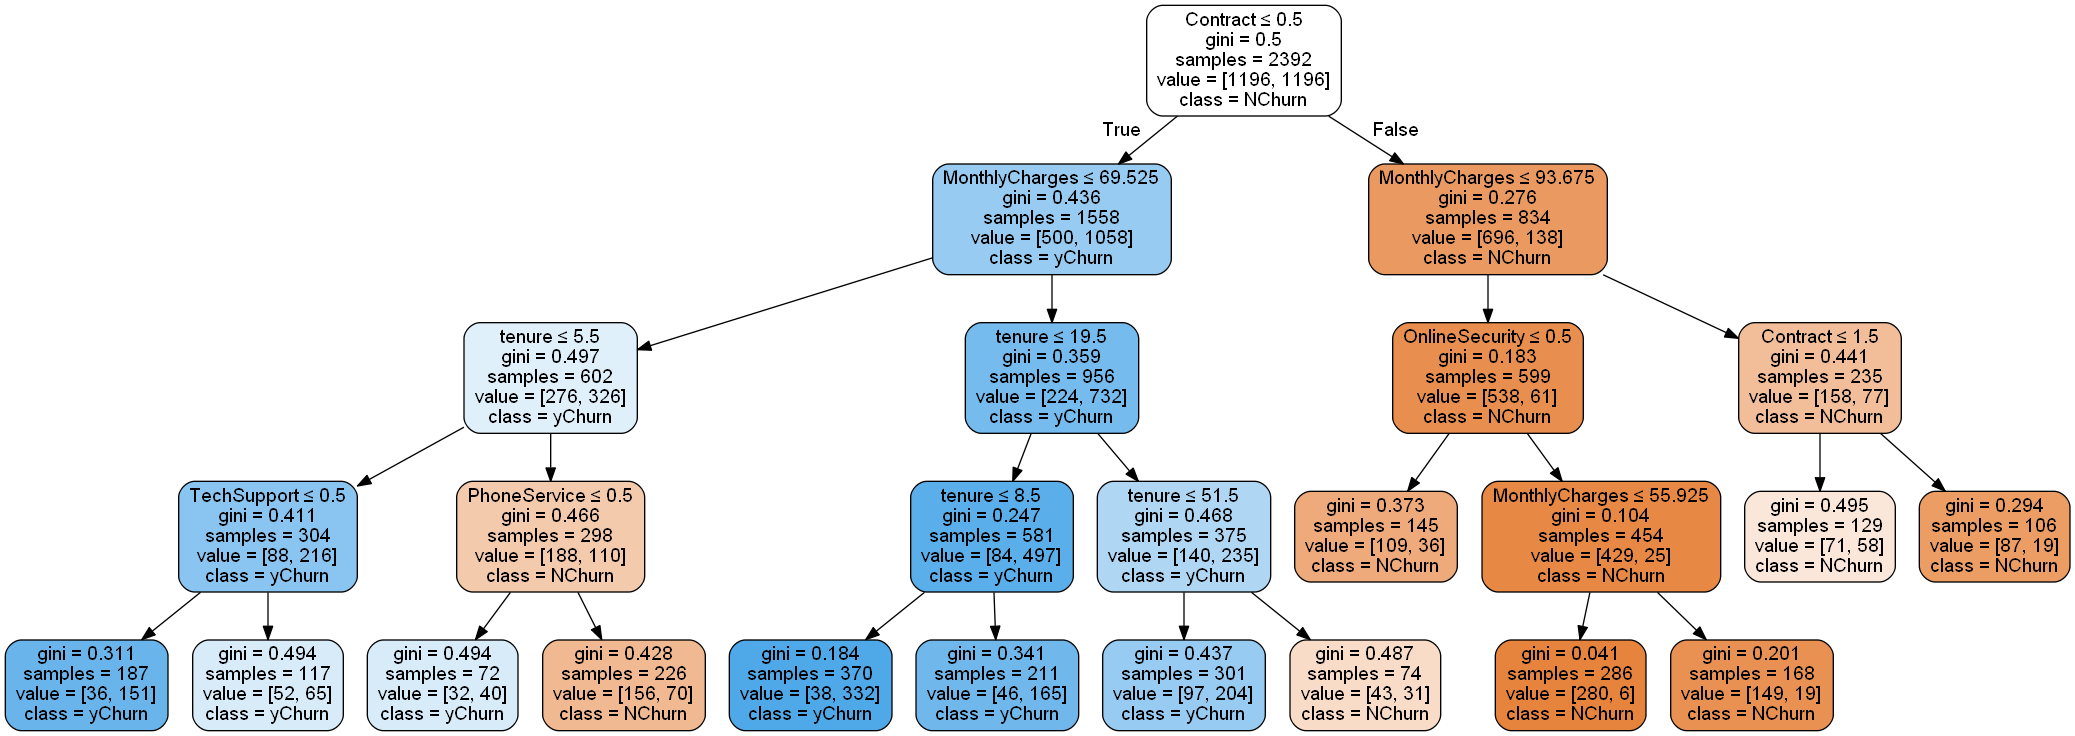

In [22]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=df_train.drop(['Churn'],axis=1).columns,
                                class_names=['yChurn' if x == 1 else 'NChurn' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True
                                )  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Feature Selection

In [23]:
df_train2=df_train.drop('gender',axis=1)

In [26]:
attributes2=[
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'ServiceCount',
 'tenure']

In [28]:
attributes = [col for col in df_train.columns if col != 'Churn']
X = df_train2[attributes2].values
y = df_train2['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100, 
                                                    stratify=y)

In [29]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=200, min_samples_leaf=50)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7615 (+/- 0.06)
F1-score: 0.7614 (+/- 0.06)


In [ ]:
quando rimuoviamo un attributo cosa vogliamo ottenere? migliorare f1-score o semplicemente cambiare il decision tree?

In [31]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7535 (+/- 0.06)
F1-score: 0.7531 (+/- 0.06)


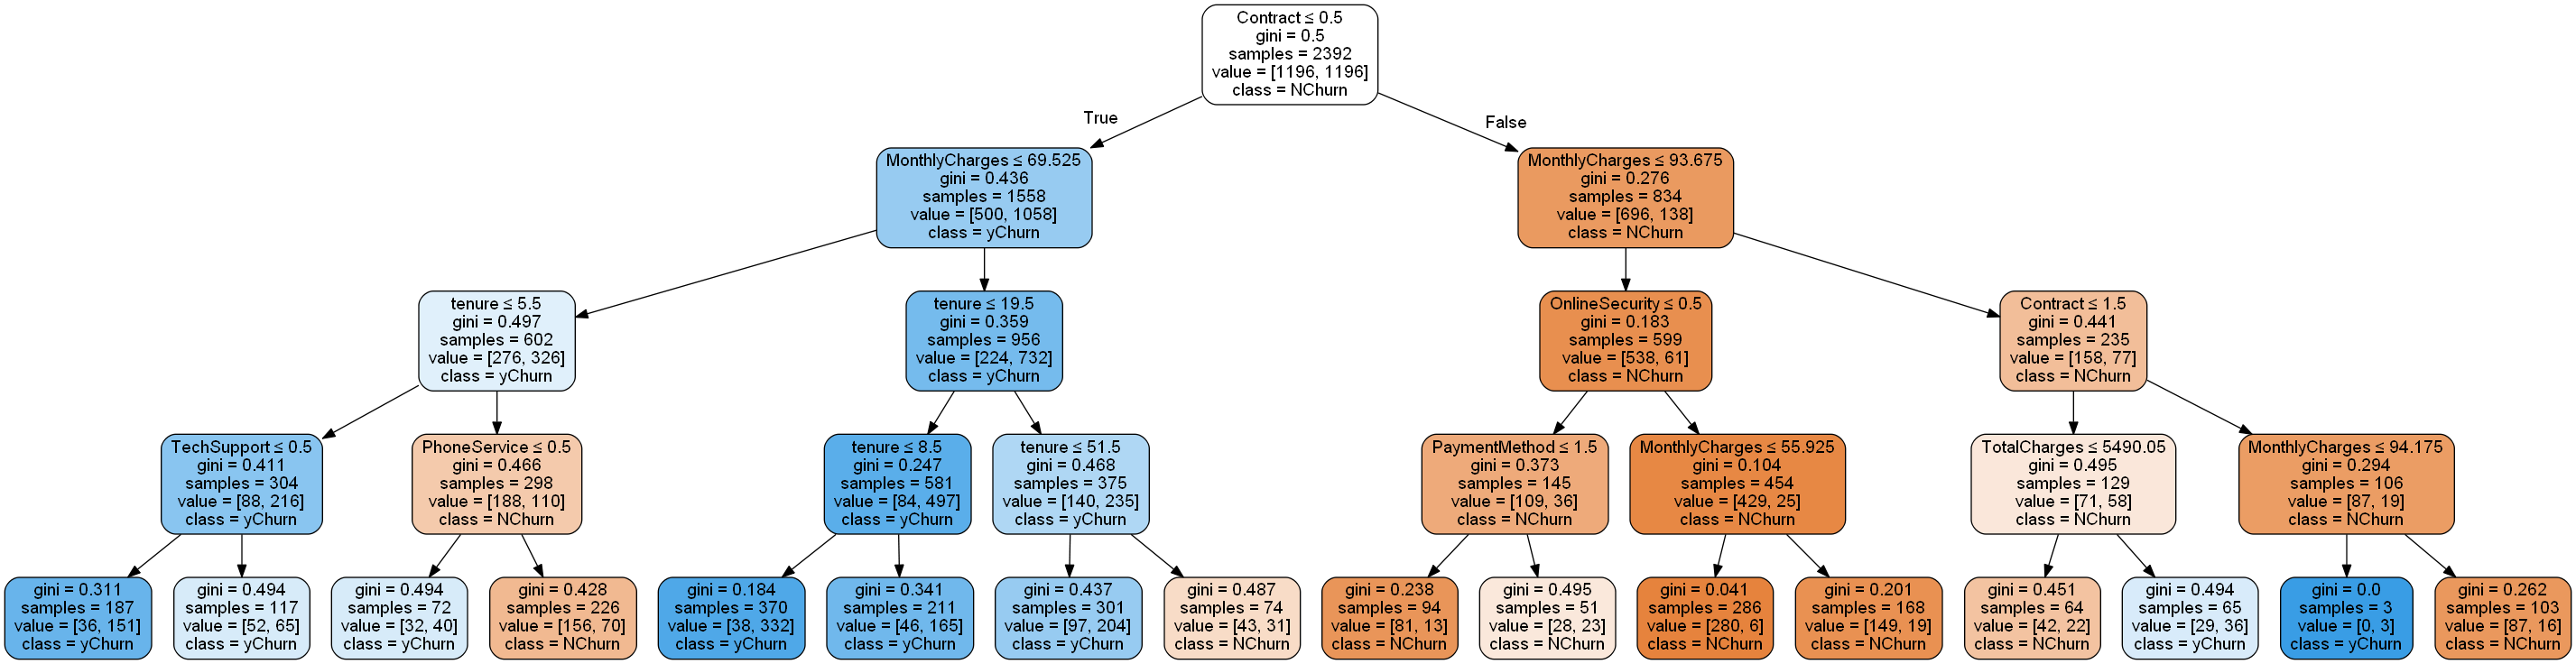

In [34]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=df_train2.drop(['Churn'],axis=1).columns,
                                class_names=['yChurn' if x == 1 else 'NChurn' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True
                                )  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

test sui dati di training che abbiamo rimosso

In [26]:
df=pd.read_csv('../datasets/Trainset.csv')
df['Churn']=df_target

In [27]:
idx=df.index.difference(df_train.index)

In [28]:
df_rmv=df.iloc[idx.values]

In [29]:
y_rmv=df_rmv.Churn
df_rmv=df_rmv.drop('Churn',axis=1)

In [30]:
y_pred = clf.predict(df_rmv.values)

In [31]:
print('Accuracy %s' % accuracy_score(y_rmv, y_pred))
print('F1-score %s' % f1_score(y_rmv, y_pred, average=None))
print(classification_report(y_rmv, y_pred))
confusion_matrix(y_rmv, y_pred)

Accuracy 0.710287443267776
F1-score [0.83060593 0.        ]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      2644
           1       0.00      0.00      0.00         0

   micro avg       0.71      0.71      0.71      2644
   macro avg       0.50      0.36      0.42      2644
weighted avg       1.00      0.71      0.83      2644



C:\Users\Coss\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Coss\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([[1878,  766],
       [   0,    0]], dtype=int64)

__________________________________

In [32]:
df_test=pd.read_csv('../datasets/Testset.csv')
ytest_target=pd.read_csv('../datasets/y_test.csv')

In [33]:
X_test = df_train[attributes].values
y_test = df_train['Churn']

In [34]:
y_pred_test=clf.predict(X_test)

In [35]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_test))
print('F1-score %s' % f1_score(y_test, y_pred_test, average=None))
print(classification_report(y_test, y_pred_test))
confusion_matrix(y_test, y_pred_test)

Accuracy 0.7678929765886288
F1-score [0.76134801 0.77408854]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1495
           1       0.75      0.80      0.77      1495

   micro avg       0.77      0.77      0.77      2990
   macro avg       0.77      0.77      0.77      2990
weighted avg       0.77      0.77      0.77      2990



array([[1107,  388],
       [ 306, 1189]], dtype=int64)